In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from joblib import dump, load
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [28]:
original = pd.read_csv('3_Data_Train.csv',sep= ";")
df = original.copy()

In [6]:
df


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,NaN,83,9-jun-2021,2,-1,0,NaN,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,21-jul-2021,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,NaN,250,9-jun-2021,1,-1,0,NaN,no
44252,44253,49,technician,casado,secundaria/superiores,no,1982,si,si,movil,73,22-aug-2021,15,-1,0,NaN,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,NaN,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,NaN,no


In [7]:
# Encuentra la fila con el menor valor en la columna de saldo
fila_menor_saldo = df.loc[df['saldo'].idxmin()]

# Muestra la fila con el menor saldo
print("Persona con menor saldo:")
print(fila_menor_saldo)


Persona con menor saldo:
ID                                               12661
edad                                                26
trabajo                                    blue-collar
estado_civil                                   soltero
educacion                        secundaria/superiores
deuda                                               si
saldo                                            -8019
vivienda                                            no
prestamo                                            si
tipo_contacto                                    movil
duracion                                           299
fecha_contacto                              7-jul-2021
campaign                                             3
tiempo_transcurrido                                 -1
contactos_anteriores                                 0
resultado_campanas_anteriores                      NaN
target                                              no
Name: 12660, dtype: object


In [8]:
# Muestra información de cada columna
for columna in df.columns:
    print(f"\nInformación de la columna '{columna}':")
    print(f"Total de valores únicos: {df[columna].nunique()}")
    print(f"Primeros 5 valores:\n{df[columna].head()}\n")


Información de la columna 'ID':
Total de valores únicos: 44256
Primeros 5 valores:
0    1
1    2
2    3
3    4
4    5
Name: ID, dtype: int64


Información de la columna 'edad':
Total de valores únicos: 77
Primeros 5 valores:
0    40
1    47
2    25
3    42
4    56
Name: edad, dtype: int64


Información de la columna 'trabajo':
Total de valores únicos: 12
Primeros 5 valores:
0    blue-collar
1       services
2        student
3     management
4     management
Name: trabajo, dtype: object


Información de la columna 'estado_civil':
Total de valores únicos: 3
Primeros 5 valores:
0     casado
1    soltero
2    soltero
3     casado
4     casado
Name: estado_civil, dtype: object


Información de la columna 'educacion':
Total de valores únicos: 3
Primeros 5 valores:
0    secundaria/superiores
1    secundaria/superiores
2           universitarios
3           universitarios
4           universitarios
Name: educacion, dtype: object


Información de la columna 'deuda':
Total de valores únicos: 2


In [9]:
# Muestra cada valor único en cada columna
for columna in df.columns:
    print(f"\nValores únicos en la columna '{columna}':")
    print(df[columna].unique())


Valores únicos en la columna 'ID':
[    1     2     3 ... 44254 44255 44256]

Valores únicos en la columna 'edad':
[40 47 25 42 56 28 24 37 30 38 33 48 31 35 46 49 43 44 23 60 51 59 58 36
 29 39 34 27 65 32 57 55 50 26 41 53 45 61 54 52 20 75 80 73 64 68 18 21
 22 63 62 70 82 76 66 71 19 69 72 74 67 77 79 84 81 78 85 83 87 86 93 89
 90 94 92 88 95]

Valores únicos en la columna 'trabajo':
['blue-collar' 'services' 'student' 'management' 'admin.' 'technician'
 'self-employed' 'entrepreneur' 'retired' 'unemployed' 'housemaid'
 'unknown']

Valores únicos en la columna 'estado_civil':
['casado' 'soltero' 'divorciado']

Valores únicos en la columna 'educacion':
['secundaria/superiores' 'universitarios' 'priamaria' nan]

Valores únicos en la columna 'deuda':
['no' 'si']

Valores únicos en la columna 'saldo':
[  580  3644   538 ... -1176  6535  8017]

Valores únicos en la columna 'vivienda':
['si' 'no']

Valores únicos en la columna 'prestamo':
['no' 'si']

Valores únicos en la columna 'tipo

In [10]:
df['trabajo'].value_counts()

trabajo
blue-collar      9519
management       9263
technician       7436
admin.           5076
services         4056
retired          2217
self-employed    1548
entrepreneur     1450
unemployed       1274
housemaid        1215
student           922
unknown           280
Name: count, dtype: int64

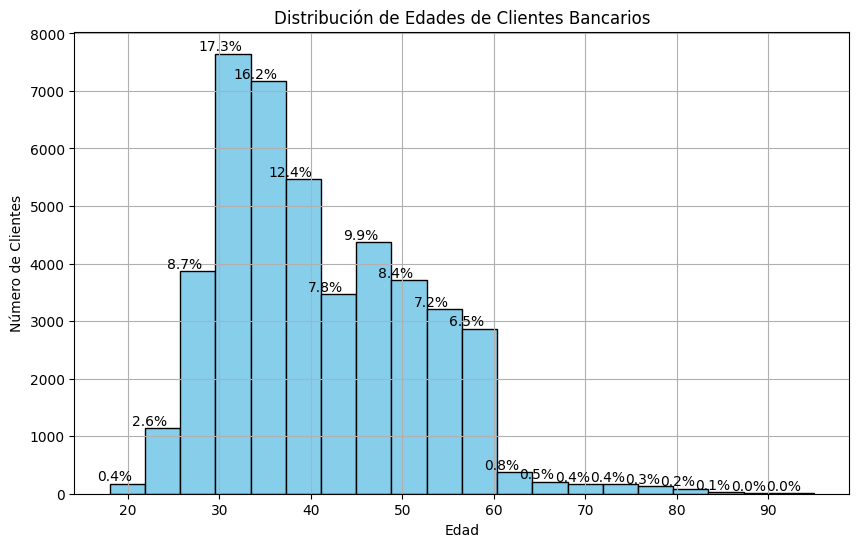

In [11]:
# Crea un histograma para visualizar la distribución de edades
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(df['edad'], bins=20, color='skyblue', edgecolor='black')

# Agrega anotaciones con porcentaje y total
for count, bin_edge in zip(n, bins):
    plt.text(bin_edge + 0.5, count, f'{count / len(df) * 100:.1f}%', ha='center', va='bottom')

plt.title('Distribución de Edades de Clientes Bancarios')
plt.xlabel('Edad')
plt.ylabel('Número de Clientes')
plt.grid(True)
plt.show()


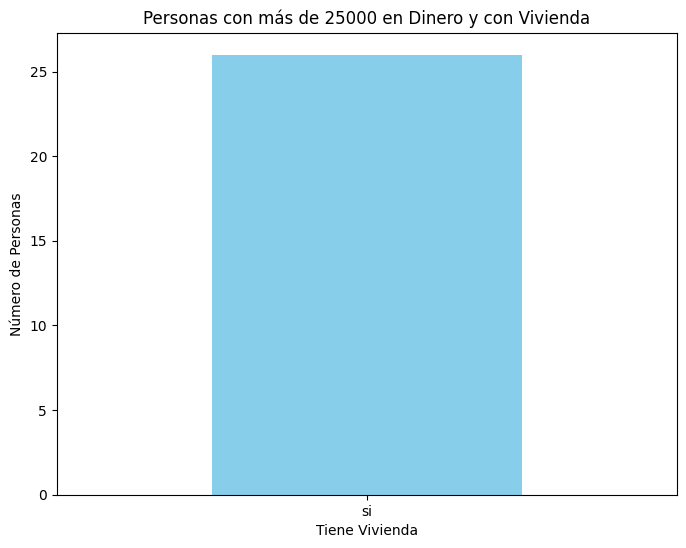

In [12]:
# Filtra las personas con más de 25000 en dinero y que tienen vivienda
personas_filtradas = df[(df['saldo'] > 25000) & (df['vivienda'] == 'si')]

# Crea un gráfico de barras
plt.figure(figsize=(8, 6))
personas_filtradas['vivienda'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Personas con más de 25000 en Dinero y con Vivienda')
plt.xlabel('Tiene Vivienda')
plt.ylabel('Número de Personas')
plt.xticks(rotation=0)
plt.show()

In [13]:
# Filtra las personas con más de 25000 en dinero y que tienen vivienda
personas_filtradas = df[(df['saldo'] > 25000) & (df['vivienda'] == 'si')]

# Imprime la cantidad de personas que cumplen con los criterios
cantidad_personas = len(personas_filtradas)
print(f"Personas con más de 25000 en dinero y vivienda: {cantidad_personas}")

Personas con más de 25000 en dinero y vivienda: 26


In [14]:
# Filtra las personas con más de 25000 en saldo y que no tienen vivienda
personas_filtradas = df[(df['saldo'] > 25000) & (df['vivienda'] == 'no')]

# Obtén el número de personas que cumplen con los criterios
cantidad_personas = len(personas_filtradas)

# Imprime el resultado
print(f"Personas con más de 25000 en saldo y sin vivienda: {cantidad_personas}")


Personas con más de 25000 en saldo y sin vivienda: 71


In [15]:
# Filtra los clientes con saldo entre 10000 y menos de 25000
clientes_filtrados = df[(df['saldo'] >= 10000) & (df['saldo'] < 25000)]

# Obtén el número de clientes que cumplen con los criterios
cantidad_clientes = len(clientes_filtrados)

# Imprime el resultado
print(f"Clientes con saldo entre 10000 y menos de 25000: {cantidad_clientes}")

Clientes con saldo entre 10000 y menos de 25000: 713


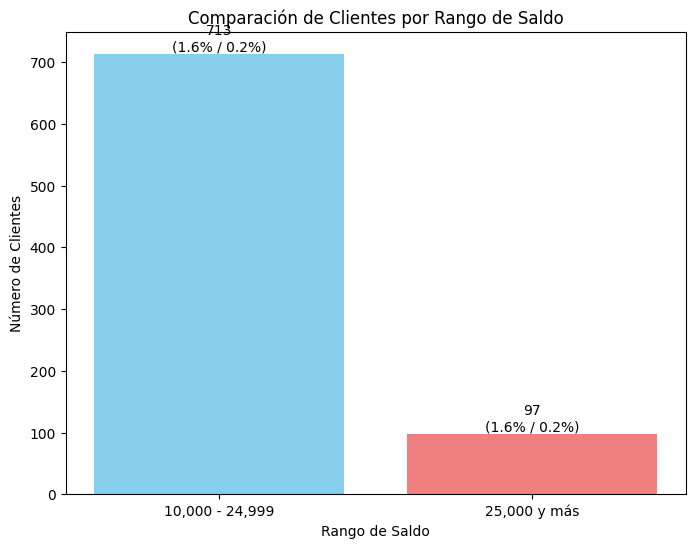

In [16]:
rango_1 = df[(df['saldo'] >= 10000) & (df['saldo'] < 25000)]
rango_2 = df[(df['saldo'] >= 25000)]

# Calcula porcentaje y total para cada rango
porcentaje_rango_1 = len(rango_1) / len(df) * 100
porcentaje_rango_2 = len(rango_2) / len(df) * 100

# Crea un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['10,000 - 24,999', '25,000 y más'], [len(rango_1), len(rango_2)], color=['skyblue', 'lightcoral'])

# Agrega anotaciones con porcentaje y total
for i, valor in enumerate([len(rango_1), len(rango_2)]):
    plt.text(i, valor + 1, f'{valor}\n({porcentaje_rango_1:.1f}% / {porcentaje_rango_2:.1f}%)', ha='center', va='bottom')

plt.title('Comparación de Clientes por Rango de Saldo')
plt.xlabel('Rango de Saldo')
plt.ylabel('Número de Clientes')
plt.show()

In [17]:


# Filtra los clientes con más de 25000 en saldo
clientes_mayor_25000 = df[df['saldo'] > 25000]

# Calcula la edad promedio de los clientes filtrados
edad_promedio = clientes_mayor_25000['edad'].mean()

# Imprime el resultado
print(f"Edad promedio de los clientes con más de 25000 de saldo: {edad_promedio:.2f} años")

Edad promedio de los clientes con más de 25000 de saldo: 49.57 años


In [18]:
# Filtra los clientes con más de 25000 en saldo
clientes_mayor_25000 = df[df['saldo'] > 25000]

# Contar la cantidad de clientes por estado civil
clientes_por_estado_civil = clientes_mayor_25000['estado_civil'].value_counts()

# Imprimir el resultado
print("Clientes con más de 25000 de saldo por estado civil:")
print(clientes_por_estado_civil)

Clientes con más de 25000 de saldo por estado civil:
estado_civil
casado        63
soltero       19
divorciado    15
Name: count, dtype: int64


In [19]:
# Filtra los clientes solteros con más de 25000 en saldo
clientes_solteros_mayor_25000 = df[(df['estado_civil'] == 'soltero') & (df['saldo'] > 25000)]

# Calcula la media de edad de los clientes solteros
media_edad_solteros = clientes_solteros_mayor_25000['edad'].mean()

# Encuentra al cliente más joven y al más viejo
cliente_mas_joven = clientes_solteros_mayor_25000.loc[clientes_solteros_mayor_25000['edad'].idxmin()]
cliente_mas_viejo = clientes_solteros_mayor_25000.loc[clientes_solteros_mayor_25000['edad'].idxmax()]

# Imprime los resultados
print(f"Media de edad de clientes solteros con más de 25000 de saldo: {media_edad_solteros:.2f} años")
print("\nCliente más joven:")
print(cliente_mas_joven[['edad', 'vivienda']])
print("\nCliente más viejo:")
print(cliente_mas_viejo[['edad', 'vivienda']])

Media de edad de clientes solteros con más de 25000 de saldo: 38.11 años

Cliente más joven:
edad        28
vivienda    no
Name: 2181, dtype: object

Cliente más viejo:
edad        59
vivienda    no
Name: 16469, dtype: object


In [20]:
# Filtra los clientes solteros con más de 25000 en saldo
clientes_solteros_mayor_25000 = df[(df['estado_civil'] == 'soltero') & (df['saldo'] > 25000)]

# Calcula la media de edad de los clientes solteros
media_edad_solteros = clientes_solteros_mayor_25000['edad'].mean()

# Encuentra al cliente más joven y al más viejo
cliente_mas_joven = clientes_solteros_mayor_25000.loc[clientes_solteros_mayor_25000['edad'].idxmin()]
cliente_mas_viejo = clientes_solteros_mayor_25000.loc[clientes_solteros_mayor_25000['edad'].idxmax()]

# Imprime los resultados
print(f"Media de edad de clientes solteros con más de 25000 de saldo: {media_edad_solteros:.2f} años")
print("\nCliente más joven:")
print(cliente_mas_joven[['edad', 'vivienda', 'trabajo']])
print("\nCliente más viejo:")
print(cliente_mas_viejo[['edad', 'vivienda', 'trabajo']])

Media de edad de clientes solteros con más de 25000 de saldo: 38.11 años

Cliente más joven:
edad                28
vivienda            no
trabajo     technician
Name: 2181, dtype: object

Cliente más viejo:
edad               59
vivienda           no
trabajo     housemaid
Name: 16469, dtype: object


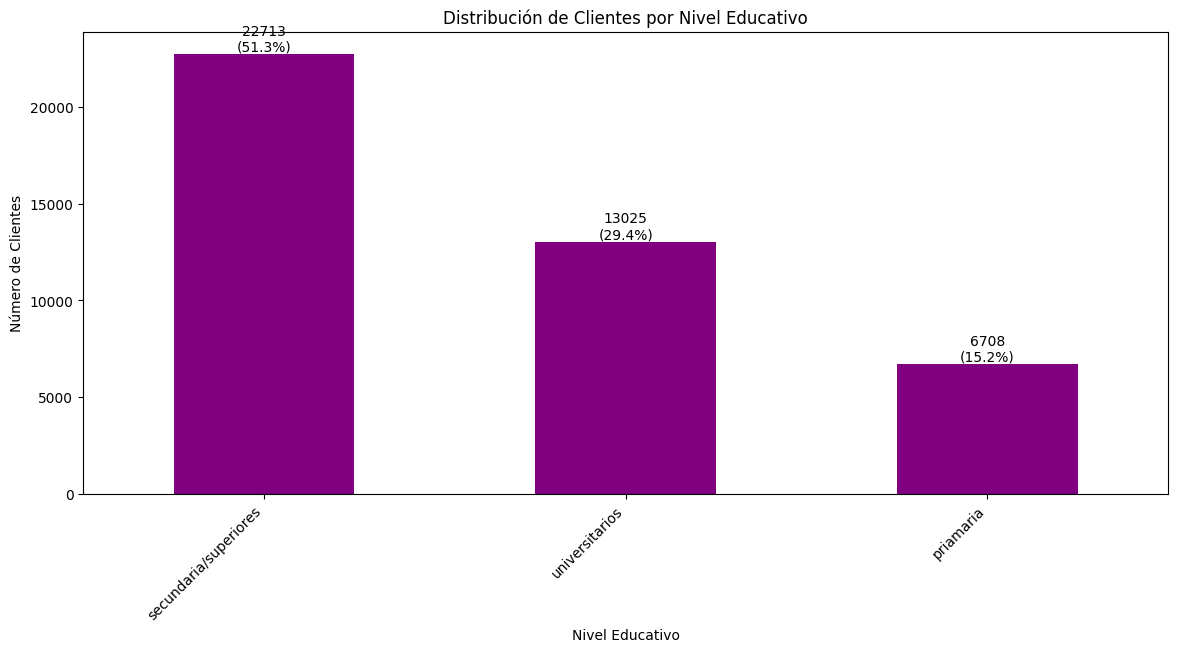

In [21]:
# Calcula el total de clientes por nivel educativo
clientes_por_educacion = df['educacion'].value_counts()

# Calcula el porcentaje de clientes por nivel educativo
porcentaje_clientes_por_educacion = clientes_por_educacion / len(df) * 100

# Crea un gráfico de barras
plt.figure(figsize=(14, 6))
clientes_por_educacion.plot(kind='bar', color='purple')
plt.title('Distribución de Clientes por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')

# Agrega anotaciones con el porcentaje
for i, valor in enumerate(clientes_por_educacion):
    plt.text(i, valor + 1, f'{valor}\n({porcentaje_clientes_por_educacion.iloc[i]:.1f}%)', ha='center', va='bottom')

plt.show()

In [22]:
# Filtra los clientes con estudios primarios
clientes_primarios = df[df['educacion'] == 'priamaria']

# Muestra información sobre los saldos de los clientes con estudios primarios
print("Información sobre los saldos de clientes con estudios primarios:")
print(clientes_primarios[['saldo']])

Información sobre los saldos de clientes con estudios primarios:
       saldo
27       699
43       650
44      1309
57      1340
59      4722
...      ...
44228     25
44231     25
44232   1472
44234   6535
44248    597

[6708 rows x 1 columns]


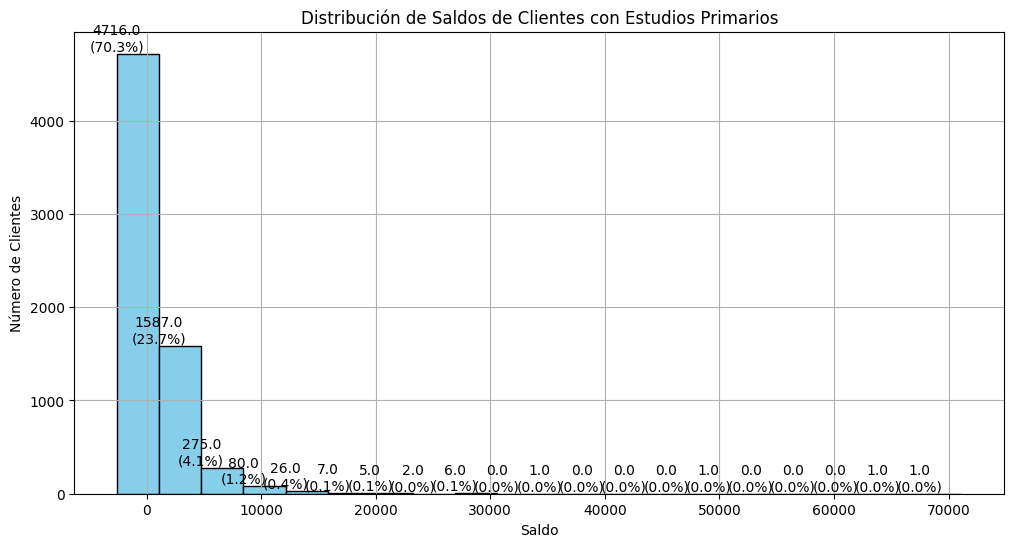

In [23]:

# Filtra los clientes con estudios primarios
clientes_primarios = df[df['educacion'] == 'priamaria']

# Crea un histograma para visualizar la distribución de saldos de clientes con estudios primarios
plt.figure(figsize=(12, 6))
n, bins, _ = plt.hist(clientes_primarios['saldo'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Saldos de Clientes con Estudios Primarios')
plt.xlabel('Saldo')
plt.ylabel('Número de Clientes')
plt.grid(True)

# Agrega anotaciones con el saldo y porcentaje
for count, bin_edge in zip(n, bins):
    porcentaje = count / len(clientes_primarios) * 100
    plt.text(bin_edge + 0.5, count, f'{count}\n({porcentaje:.1f}%)', ha='center', va='bottom')

plt.show()

Ocupaciones más comunes entre los clientes:
trabajo
blue-collar      9519
management       9263
technician       7436
admin.           5076
services         4056
retired          2217
self-employed    1548
entrepreneur     1450
unemployed       1274
housemaid        1215
student           922
unknown           280
Name: count, dtype: int64

Porcentajes:
trabajo
blue-collar      21.508948
management       20.930495
technician       16.802242
admin.           11.469631
services          9.164859
retired           5.009490
self-employed     3.497831
entrepreneur      3.276392
unemployed        2.878706
housemaid         2.745390
student           2.083333
unknown           0.632683
Name: count, dtype: float64


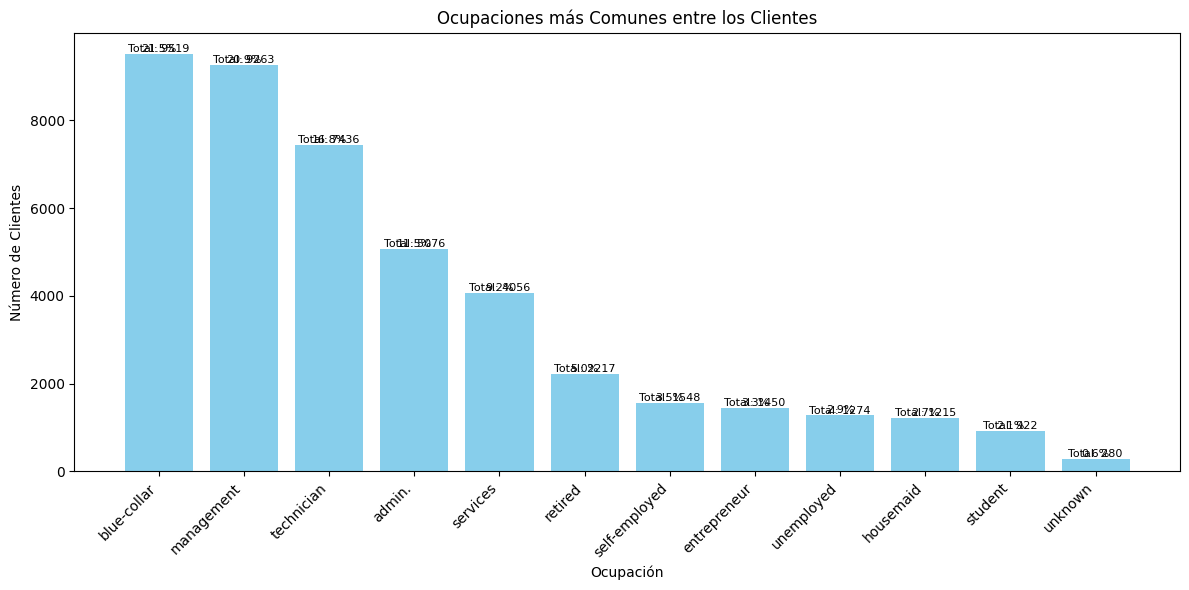

In [24]:
# Calcula las ocupaciones más comunes
ocupaciones_mas_comunes = df['trabajo'].value_counts()

# Calcula los porcentajes
porcentajes = ocupaciones_mas_comunes / ocupaciones_mas_comunes.sum() * 100

# Muestra las ocupaciones más comunes con porcentajes
print("Ocupaciones más comunes entre los clientes:")
print(ocupaciones_mas_comunes)
print("\nPorcentajes:")
print(porcentajes)

# Crea un gráfico de barras para visualizar las ocupaciones más comunes
plt.figure(figsize=(12, 6))
bars = plt.bar(ocupaciones_mas_comunes.index, ocupaciones_mas_comunes, color='skyblue')

# Ajusta las anotaciones para evitar superposiciones
for bar, percentage, total in zip(bars, porcentajes, ocupaciones_mas_comunes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.6,
             f"{percentage:.1f}%", ha='center', va='bottom', fontsize=8, color='black')
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.8,
             f"Total: {total}", ha='center', va='bottom', fontsize=8, color='black')

# Personaliza el gráfico
plt.title('Ocupaciones más Comunes entre los Clientes')
plt.xlabel('Ocupación')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajusta automáticamente los márgenes para evitar recorte
plt.show()

In [25]:
targetsi=df[df['target'] == 'si']
targetsi

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
10,11,33,blue-collar,soltero,secundaria/superiores,no,498,no,no,movil,301,30-apr-2021,1,-1,0,NaN,si
13,14,31,management,divorciado,universitarios,no,883,si,no,movil,112,5-mar-2021,2,106,1,sin_exito,si
15,16,30,management,soltero,universitarios,no,536,no,no,movil,244,15-oct-2021,1,105,1,exito,si
19,20,33,management,soltero,universitarios,no,5437,no,no,movil,267,4-may-2021,1,91,1,sin_exito,si
21,22,35,management,casado,universitarios,no,991,si,no,movil,1489,6-may-2021,3,-1,0,NaN,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44212,44213,42,technician,casado,universitarios,no,14282,si,no,movil,649,6-aug-2021,4,-1,0,NaN,si
44221,44222,37,admin.,casado,universitarios,no,3221,no,no,movil,379,15-jun-2021,2,376,13,otro,si
44235,44236,32,management,soltero,universitarios,no,935,no,no,movil,161,10-aug-2021,2,375,5,sin_exito,si
44236,44237,49,management,divorciado,universitarios,no,348,no,no,movil,125,30-oct-2021,1,-1,0,NaN,si


target
no    22705
si     1902
Name: count, dtype: int64


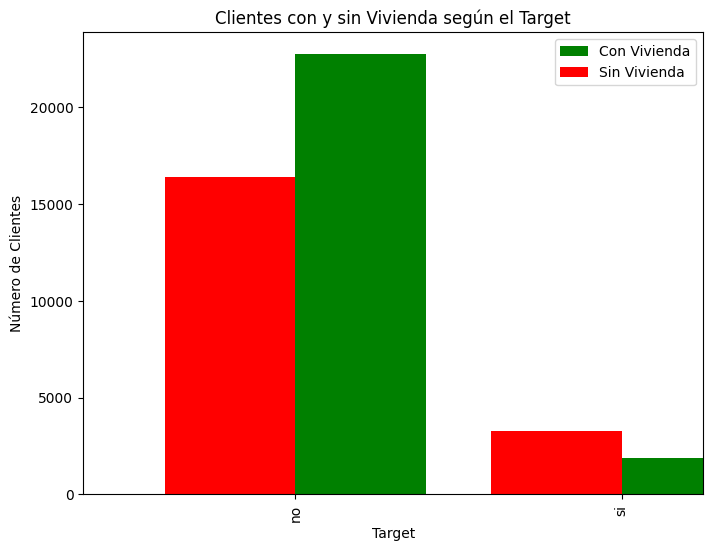

In [26]:

# Contar la cantidad de clientes con y sin vivienda según la columna 'target'
clientes_con_vivienda = df[df['vivienda'] == 'si']['target'].value_counts()
clientes_sin_vivienda = df[df['vivienda'] == 'no']['target'].value_counts()
print(f'{clientes_con_vivienda}')
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
clientes_con_vivienda.plot(kind='bar', color='green', label='Con Vivienda', ax=ax, position=0, width=0.4)
clientes_sin_vivienda.plot(kind='bar', color='red', label='Sin Vivienda', ax=ax, position=1, width=0.4)

ax.set_title('Clientes con y sin Vivienda según el Target')
ax.set_xlabel('Target')
ax.set_ylabel('Número de Clientes')
ax.legend()

plt.show()

In [27]:
LR=LogisticRegression() 

Predictions=LR.predict_proba(X_test) #(aqui te devuelve las predicciones y y te las separa por predic 0 y predic 1 0.8 (te lo devuelve en forma de matriz ) 

#Que probabilidad hay que no y que si  

Predictions[:,1] 

NameError: name 'X_test' is not defined

In [ ]:
df[‘target’]=predictions>0.9  y luego df[‘compran]=predictions>0.7 

df[‘target’]=1*(predictions>0.9)  

SyntaxError: invalid character '‘' (U+2018) (2607345120.py, line 1)

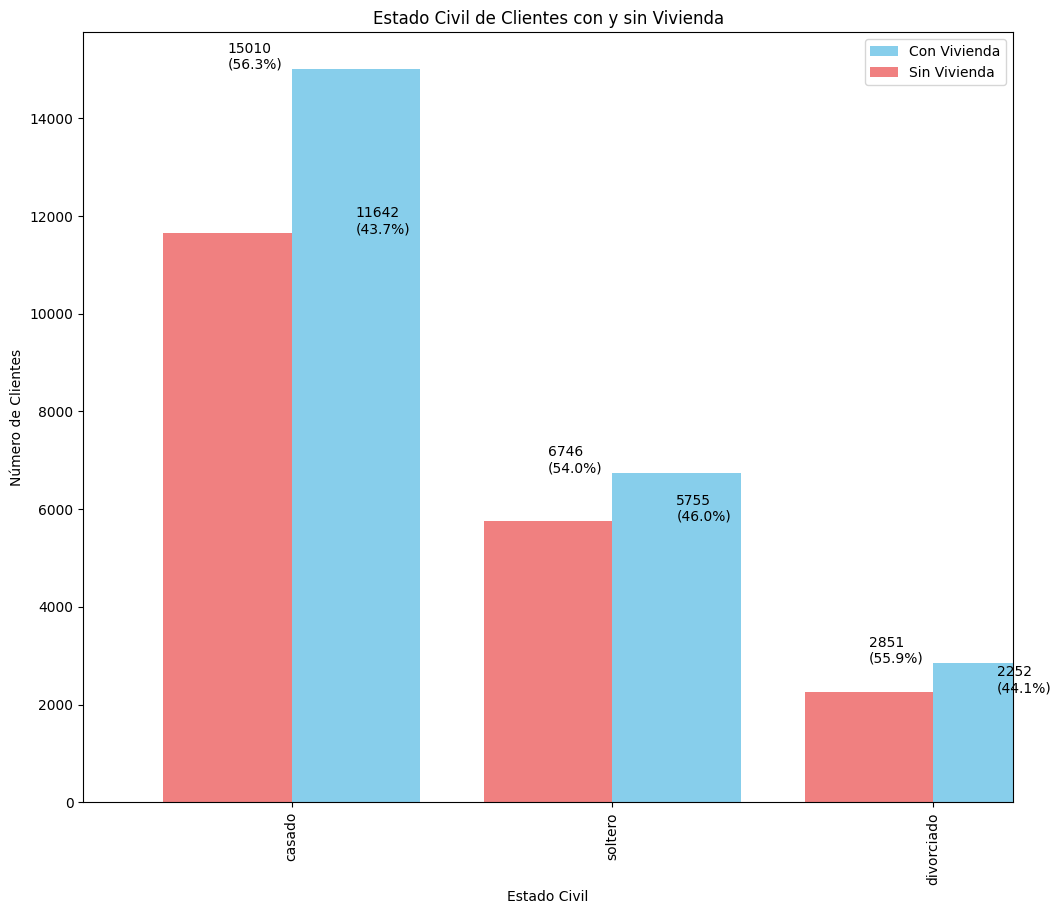

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame con los datos

# Filtrar clientes con vivienda y estado civil
con_vivienda = df[df['vivienda'] == 'si']
sin_vivienda = df[df['vivienda'] == 'no']

# Contar el estado civil de clientes con y sin vivienda
con_vivienda_estado_civil = con_vivienda['estado_civil'].value_counts()
sin_vivienda_estado_civil = sin_vivienda['estado_civil'].value_counts()

# Crear un gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 10))
con_vivienda_estado_civil.plot(kind='bar', color='skyblue', label='Con Vivienda', position=0, width=0.4, ax=ax)
sin_vivienda_estado_civil.plot(kind='bar', color='lightcoral', label='Sin Vivienda', position=1, width=0.4, ax=ax)

ax.set_title('Estado Civil de Clientes con y sin Vivienda')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('Número de Clientes')

# Agregar anotaciones con cantidad y porcentaje
for i, (con, sin) in enumerate(zip(con_vivienda_estado_civil, sin_vivienda_estado_civil)):
    total = con + sin
    porcentaje_con = (con / total) * 100
    porcentaje_sin = (sin / total) * 100

    plt.text(i - 0.2, con + 5, f'{con}\n({porcentaje_con:.1f}%)', color='black')
    plt.text(i + 0.2, sin + 5, f'{sin}\n({porcentaje_sin:.1f}%)', color='black')

ax.legend()
plt.show()

